### Let's set up our work environment

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Get the data

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

### Discover the data

In [3]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Look at the Big Picture
Each row represents informations about one worker. There are 2 attributs : YearsExperience and Salary. We see that there is no null values (NaN). The info() method will give us more informations. It is very important to distinguish the difference between the independent variables and the dependent variables. Here,the independent variable is YearsExperience and the dependent variable is Salary. 

### Frame the problem
We are going to find a correlation between the numbers of year experience and salaries of workers. We want to predict salaries of other workers who have many years experience.

Business Scenario: We can imagine that this dataset is thus a dataset of a company who the manager need to make predictions on workers's salaries in order to make some anticipations. We are going to help this manager to make good predictions.

### Visualize the data to gain insights

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


There are 30 instances in the dataset. It is very small by Machine Learning standards, but it's perfect to get started and learned. There are 30 non-null values. Meaning that there is no value missing. All attributes are numerical. No categorical attributes here.
Let's look at the other fields. The describe() method shows a summary of the numerical attributes.

In [5]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


The count, mean, min, and max rows are self-explanatory. The std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the workers have an YearsExperience lower than 3.2 and salary lower than 56 720, while 50% have an YearsExperience lower than 4.7 and salary lower than 65 237 and 75% have an YearsExperience lower than 7.7  and salary 100 544.

### Preparation the data for Machine Learning algoritms
We will start by creating 2 matrix. A matrix of independent variable (YearsExperince) and next, another matrix that will be the vector of the dependent variable (Salary).

#### Create variables : x and y
Create our variables, we are going to use a very useful technical of Pandas, named Iloc.

In [6]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Visualize x and y

In [7]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

We see values of YearsExperince's column. Good!

In [8]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

We also see here values of Salary's column.

### Divide the dataset in Training / Test Set

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1.0/3, random_state = 0)

In [16]:
# Take a look on new variables (x_train, y_train, x_test and y_test)
x_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [17]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [18]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [19]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

### Select and train a model
The chosen model is that of a simple linear model because we are dealing here with a linear problem, composed of a single independent variable.

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Make new predictions

In [21]:
y_pred = regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

These values are salaries predictions of Test Set's values.

In [22]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

Comparing the values of y_test and y_pred, we realize that there is not too much difference.

In [24]:
# Predict the salary of an employee with 15 years of experience
en

array([167005.32889087])

In [25]:
# Predict the salary of an employee with 50 years of experience
regressor.predict(np.array([[50]]))

array([494113.31440015])

### Visualize our results

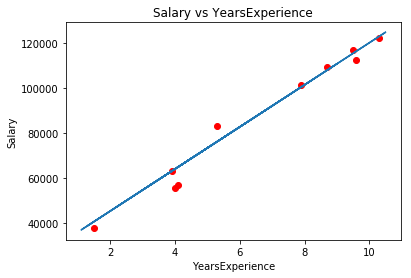

In [26]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train))
plt.title('Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Analysis: the red dots are our real observations that is to say correspond to the real observations of the employees of the company with the ordinate the wages and in abscissa, the years of experience. And this blue line corresponds to our simple linear regression model that is to say, corresponds to the prediction points for each of the years of experience from 0 to 12 years of experience. Overall, there are excellent predictions. The blue line itself sometimes passes through several red dots. So we can easily conclude that a linear regression model is quite appropriate for this kind of problem.

### Accuracy

In [27]:
# Accuracy
regressor.score(x_test, y_test)

0.9749154407708353

97.49%. Very acceptable result.